## Data: Hyperspectral Remote Sensing Scenes
> http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes

### PaviaU Dataset
http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat

http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

## 读取数据

In [60]:
def read_HSI():
    X = loadmat('dataset/PaviaU.mat')['paviaU']
    y = loadmat('dataset/PaviaU_gt.mat')['paviaU_gt']
    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    
    return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


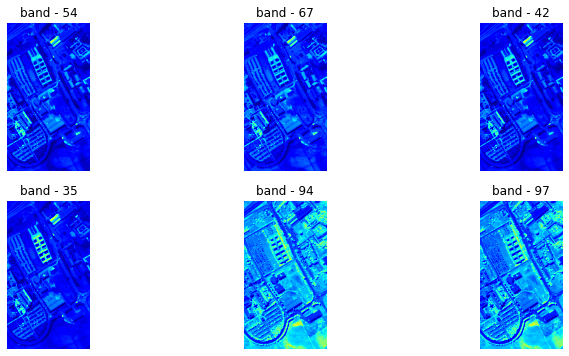

In [62]:
import seaborn as sns
sns.axes_style('whitegrid')
fig = plt.figure(figsize=(12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2, 3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:, :, q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

### 查看图像的真实标注

In [89]:
!pip install plotly
import plotly.express as px

cls = px.imshow(y, color_continuous_scale='jet')

cls.update_layout(title='Ground Truth', coloraxis_showscale=True)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()

### 将图像转换为CSV存储

In [68]:
def extract_pixels(X, y, save_name='indian_pines_all'):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(q)
    df = pd.concat([df, pd.DataFrame(y.ravel())], axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
    df.to_csv(f'dataset/{save_name}.csv')
    
    return df

In [69]:
df = extract_pixels(X, y, save_name='PaviaU')
df

band1  band2  band3  band4  band5  band6  band7  ...  band98  band99  band100  band101  band102  band103  class
0         647    499    464    371    291    319    365  ...    3226    3205     3210     3221     3238     3250      0
1         604    546    527    455    378    377    336  ...    2511    2501     2468     2442     2464     2528      0
2         621    746    556    360    285    300    274  ...    2202    2225     2266     2308     2345     2361      0
3         637    592    482    556    508    284    178  ...    2551    2571     2569     2573     2620     2644      0
4         625    560    480    360    377    341    264  ...    2328    2415     2424     2386     2431     2456      0
...       ...    ...    ...    ...    ...    ...    ...  ...     ...     ...      ...      ...      ...      ...    ...
207395    574    594    504    411    468    443    378  ...    2169    2151     2108     2077     2076     2136      0
207396    485    644    709    582    504    494    434  ...    2265    2275     2293     2274     2274     2258      0
207397    593    387    428    461    470    392    331  ...    2413    2373     2389     2382     2407     2423      0
207398    593    751    655    458    503    560    482  ...    2288    2251     2280     2312     2308     2289      0
207399    889    720    449    402    409    410    424  ...    2488    2498     2455     2416     2447     2485      0

[207400 rows x 104 columns]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [71]:
df.iloc[:, :-1].describe()

band1          band2          band3  ...        band101        band102        band103
count  207400.000000  207400.000000  207400.000000  ...  207400.000000  207400.000000  207400.000000
mean      925.324995     850.237584     800.363558  ...    2224.744884    2236.901707    2253.451692
std       444.427499     468.464292     493.590158  ...     827.257369     834.092348     844.165146
min         0.000000       0.000000       0.000000  ...       0.000000     134.000000       0.000000
25%       649.000000     555.000000     483.000000  ...    1675.000000    1682.000000    1692.000000
50%       857.000000     762.000000     694.000000  ...    2226.000000    2244.000000    2261.000000
75%      1111.000000    1046.000000    1015.000000  ...    2677.000000    2692.000000    2715.000000
max      8000.000000    8000.000000    8000.000000  ...    8000.000000    8000.000000    8000.000000

[8 rows x 103 columns]

## PCA

由于HSI数据集具有较高的维度，因此难以处理庞大的数据。 因此，使用主成分分析（PCA）将数据的维数缩减为3D，这是一种流行且广泛使用的降维技术。 以下代码用于将数据集的尺寸减少为三个。

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
data = df.iloc[:, :-1].values
dt = pca.fit_transform(data)
q = pd.concat([pd.DataFrame(dt), pd.DataFrame(y.ravel())], axis=1)
q.columns = [f'PC-{i}' for i in range(1, 4)] + ['class']
q.head()

PC-1         PC-2         PC-3  class
0 -5150.190044  6795.052770  1532.351461      0
1 -6082.245760  3158.592195  1463.194744      0
2 -7214.505405  1158.875812  1400.817899      0
3 -6566.279360  3398.894763  1126.024772      0
4 -6496.967970  2154.797771  1035.954575      0

In [73]:
q.to_csv('dataset/paviaU_pca3.csv', index=False)

In [74]:
# Removing class - 0 as it is not need.
q2 = q[q['class'] != 0]
q2['class'].value_counts()

2    18649
1     6631
6     5029
8     3682
4     3064
3     2099
5     1345
7     1330
9      947
Name: class, dtype: int64

In [76]:
class_labels = {'1':'Asphalt',
                '2':'Meadows',
                '3':'Gravel',
                '4':'Trees',
                '5':'Painted metal sheets',
                '6':'Bare Soil',
                '7':'Bitumen',
                '8':'Self Blocking Bricks',
                '9':'Shadows'
               }

In [81]:
# 添加真实标签列：将数值标签映射到对应的真实标签
q2['label'] = q2.loc[:, 'class'].apply(lambda x: class_labels[str(x)])

<ipython-input-81-658f22e8acbf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
q2['label'].value_counts()

Meadows                 18649
Asphalt                  6631
Bare Soil                5029
Self Blocking Bricks     3682
Trees                    3064
Gravel                   2099
Painted metal sheets     1345
Bitumen                  1330
Shadows                   947
Name: label, dtype: int64

In [83]:
q2.head()

PC-1         PC-2         PC-3  class    label
91  4894.139640 -3430.386762  -873.195311      1  Asphalt
92  3125.663208 -6615.473932  1122.107496      1  Asphalt
93 -1538.206534 -5943.101140  1388.775323      1  Asphalt
94   780.787410 -1051.450839  -815.558091      1  Asphalt
95  9148.499570 -4150.656217 -1987.224082      1  Asphalt

## 可视化

In [85]:
import plotly.express as px
count = q2['class'].value_counts()
bar_fig = px.bar(x=count.index[1:], y=count[1:], labels=class_labels, color=count.index[1:])
bar_fig.update_layout(xaxis = dict(title='Class', 
                                   tickmode='array', 
                                   tickvals=count.index[1:].tolist(), 
                                   tickangle = 45,
                                  ),
                      yaxis = dict(title='count',),
                      showlegend=True
                     )
bar_fig.show()

In [87]:
# 重采样一部分样本以便可视化
# sampling dataset
sample_size = 200
sample = q2.groupby('class').apply(lambda x: x.sample(sample_size))
sample

PC-1         PC-2         PC-3  class    label
class                                                               
1     114669  -1086.839913 -4806.066297   -67.395816      1  Asphalt
      184630  -2338.194720 -5834.971042   601.210197      1  Asphalt
      47770   -3117.959907 -5262.848296   439.352096      1  Asphalt
      197942  -1634.485591 -5508.314551   286.624511      1  Asphalt
      56443     399.095522 -5049.223369   524.850026      1  Asphalt
...                    ...          ...          ...    ...      ...
9     106924 -10159.698521 -7900.771789   318.009451      9  Shadows
      108953 -10458.313382 -7938.823281   398.994594      9  Shadows
      128665  -9659.605774 -8280.396753   707.954782      9  Shadows
      129343 -10166.642403 -8390.225823   556.160039      9  Shadows
      83140   -8376.789971 -7791.265988  1338.548118      9  Shadows

[1800 rows x 5 columns]

In [91]:
!pip install chart_studio
import chart_studio.plotly as py

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)


In [100]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
                 hover_name="label", log_x=True, size_max=12)
fig.show()

In [102]:
# Box Plot
fig = px.violin(sample, y="PC-1", x="PC-2", color="label", 
                      box=True, points="all", hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

In [103]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", 
                           color="label", size="class", hover_name="label",symbol="label")
# color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
scatter_3d.show()
# py.plot(scatter_3d, filename = 'scatter_3d', auto_open=True)

堆叠面积图适用于可视化“部分-整体”的关系，这有助于展现各分类及总体的发展趋势和相互之间的关系。

层叠面积图上最大的面积代表了所有数据量的总和，是一个整体。各个叠起来的面积表示各个数据量的大小，这些堆叠起来的面积图在表现大数据的总分量的变化情况时格外有用，所以层叠面积图非常适用于对比多变量随时间变化的情况。层叠面积图并不能反映总量的变化，但是可以清晰的反应每个数值所占百分比随时间或类别变化的趋势线，这对于分析自变量是大数据、时变数据、有序数据时各个指标分量占比极为有用。


> ref:https://www.edrawsoft.cn/what-is-area-chart/mianjitu

In [96]:
area_plt1 = px.area(sample, x="PC-1", y="PC-2", color="label", line_group="label")
area_plt1.show()
# py.plot(area_plt1, filename = 'area_plt1', auto_open=True)

In [97]:
area_plt2 = px.area(sample, x="PC-1", y="PC-3", color="label", line_group="label")
area_plt2.show()
# py.plot(area_plt2, filename = 'area_plt2', auto_open=True)

In [98]:
area_plt3 = px.area(sample, x="PC-2", y="PC-3", color="label", line_group="label")
area_plt3.show()
# py.plot(area_plt3, filename = 'area_plt2', auto_open=True)

In [99]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()
# py.plot(pair, filename = 'pair_plot_pc', auto_open=True)